In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import pickle

home = '/home/jovyan/jupyterhub-shared/Wouter/simulation_data/'

# Give colours in hex
c_qubit     = '#664277'  # qubit
c_cavity1   = '#fa476f'  # cavity 1
c_cavity2   = '#c86464'  # cavity 2
c_coupling1 = '#68b799'  # coupling between qubit and cavity 1
c_coupling2 = '#7eb6a1'  # coupling between qubit and cavity 1
c_drive     = '#68b799'  # single-tone drive strength
c_driveq    = 'green'    # qubit-friendly drive tone strength
c_drivec    = 'cyan'     # cavity-friendly drive tone strenth
c_sbred     = '#c86464'  # P(e0)-P(g1), red sideband transitions
c_sbblue    = '#6196b3'  # P(e1)-P(g0), blue sideband transitions
c_hline     = 'gray'     # horizontal domain lines
c_colormap  = 'gist_heat'   # colormap for color plots

mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['lines.linewidth'] = 2

In [2]:
def load_data(quants, srcfolder):
    """
    Extract the full evolution of specified saved quantities of a simulation.
    All quantities not specified in quants are returned as NoneType.
    
    quants : str, list of str
        Specific quantities to extract from batches and combine into a file.
        Can contain 'times', 'states', 'expect', 'g0', 'g1', 'e0', 'e1', and 'coupling'.
        Default is 'all' which selects all of these.
    srcfolder : str
        Path to the simulation folder
        
    Returns
    -------
    times : np.array
        All time values
    states : list of qutip.Qobj
        All quantum states through time
    expect : list of list
        All expected occupation numbers
    e0 : np.array
        All probabilities of |e0>
    g1 : np.array
        All probabilities of |g1>
    e1 : np.array
        All probabilities of |e1>
    g0 : np.array
        All probabilities of |g0>
    coupling : np.array
        Coupling strength of the drive tone(s) through time
    """
    if quants == 'all':
        quants = ['times', 'states', 'expect', 'g0', 'g1', 'e0', 'e1', 'coupling']
    if isinstance(quants, str):
        quants = [quants]
    
    if 'times' in quants:
        tfile = open(srcfolder + "/times.pkl", 'rb')
        tdata = pickle.load(tfile)
        times = tdata['data']
        tfile.close()
        del tdata
    else:
        times = None

    if 'e1' in quants:
        pfile = open(srcfolder + "/e1.pkl", 'rb')
        pdata = pickle.load(pfile)
        e1 = pdata['data']
        pfile.close()
        del pdata
    else:
        e1 = None
    
    if 'g0' in quants:
        pfile = open(srcfolder + "/g0.pkl", 'rb')
        pdata = pickle.load(pfile)
        g0 = pdata['data']
        pfile.close()
        del pdata
    else:
        g0 = None
    
    if 'coupling' in quants:
        gfile = open(srcfolder + "/coupling.pkl", 'rb')
        gdata = pickle.load(gfile)
        coupling = gdata['data']
        gfile.close()
        del gdata
    else:
        coupling = None
    
    if 'expect' in quants:
        efile = open(srcfolder + "/expect.pkl", 'rb')
        edata = pickle.load(efile)
        expect = edata['data']
        efile.close()
        del edata
    else:
        expect = None
    
    return times, e1, g0, coupling, expect

In [9]:
quants = ['times', 'e1', 'g0', 'coupling', 'expect']

folder1 = "data_200511_074439_blue_Nq10_Nt1_eps0.6_wd5.216_wq6.5_wc4.0_wsb0.0"
srcfolder1 = home + folder1
times1, e1_1, g0_1, coupling1, expect1 = load_data(quants, srcfolder1)

folder2 = "data_191108_084954_blue_Nq10_Nt1_Om0.6_wd5.216_wq6.5_wc4.0_wsb0.0037"
srcfolder2 = home + folder2
times2, e1_2, g0_2, coupling2, expect2 = load_data(quants, srcfolder2)

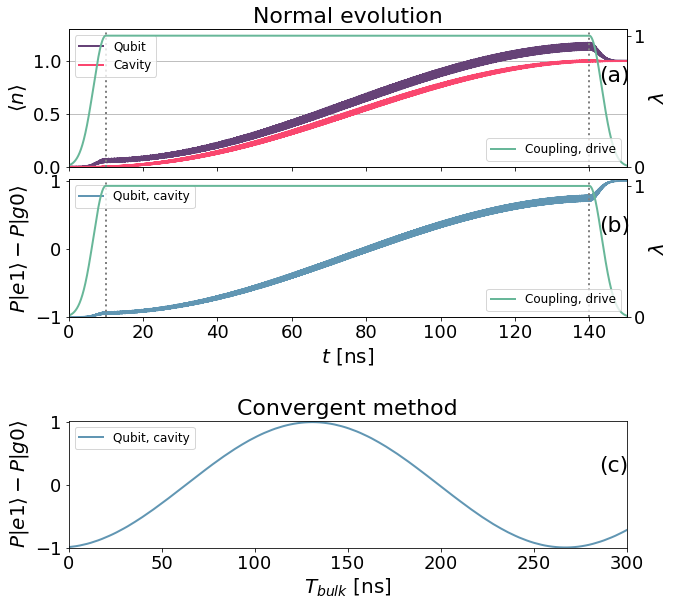

In [26]:
fig = plt.figure(figsize=(10, 8), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=1, top=0.95, bottom=0.45,
                        hspace=0.09)

ax11 = fig.add_subplot(gs1[0, 0])
ax11.plot(times1, expect1[0], c=c_qubit, label='Qubit')
ax11.plot(times1, expect1[1], c=c_cavity1, label='Cavity')
ax11.set_xlim([0, 150])
ax11.set_ylim([0, 1.3])
ax11.set_xticklabels([])
ax11.set_ylabel("$\\left<n\\right>$")
ax11.legend(loc='upper left')

ax11.axvline(10, ls=':', color='gray')
ax11.axvline(140, ls=':', color='gray')
ax11.grid(True, axis='y')

ax12 = ax11.twinx()
ax12.plot(times1, coupling1, c=c_coupling1, label='Coupling, drive')
ax12.set_ylim([0, 1.05])
ax12.set_yticks([0, 1])
ax12.set_ylabel("$\\lambda$")
ax12.legend(loc='lower right')
plt.title("Normal evolution")
ax12.text(142.5, 0.65, "(a)")



ax21 = fig.add_subplot(gs1[1, 0])
ax21.plot(times1, e1_1-g0_1, c=c_sbblue, label='Qubit, cavity')
ax21.set_xlim([0, 150])
ax21.set_ylim([-1, 1.02])

ax21.set_xlabel("$t$ [ns]")
ax21.set_ylabel("$P\\left|e1\\right>-P\\left|g0\\right>$")
ax21.legend(loc='upper left')

ax21.axvline(10, ls=':', color='gray')
ax21.axvline(140, ls=':', color='gray')

ax22 = ax21.twinx()
ax22.plot(times1, coupling1, c=c_coupling1, label='Coupling, drive')
ax22.set_ylim([0, 1.05])
ax22.set_yticks([0, 1])
ax22.set_ylabel("$\\lambda$")
ax22.legend(loc='lower right')
ax22.text(142.5, 0.65, "(b)")



gs2 = fig.add_gridspec(nrows=1, ncols=1, top=0.27, bottom=0.05,
                        wspace=0.05)

ax31 = fig.add_subplot(gs2[0, 0])
ax31.plot(times2-20, e1_2-g0_2, c=c_sbblue, label='Qubit, cavity')
ax31.set_xlim([0, 300])
ax31.set_ylim([-1, 1.02])
ax31.legend(loc='upper left')

ax31.set_xlabel("$T_{{bulk}}$ [ns]")
ax31.set_ylabel("$P\\left|e1\\right>-P\\left|g0\\right>$")
ax31.set_title("Convergent method")
ax31.text(285, 0.2, "(c)")

plt.show()